In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
data = pd.read_csv('data/data-giantbomb.csv').drop(['Unnamed: 0','Description'], axis=1)

In [28]:
data

,user_id,game_name,behavior,hours,Description[giantbomb]
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,OverviewTaking place in the eponymous province...
1,151603712,The Elder Scrolls V Skyrim,play,273.0,OverviewTaking place in the eponymous province...
2,151603712,Fallout 4,purchase,1.0,OverviewFallout 4 is the fifth major installme...
3,151603712,Fallout 4,play,87.0,OverviewFallout 4 is the fifth major installme...
4,151603712,Spore,purchase,1.0,OverviewSpore is the latest game from the prod...
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,OverviewTitan Souls is a top down action game ...
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,"OverviewIn 2002, close on the heels of revolut..."
199997,128470551,Grand Theft Auto Vice City,play,1.5,"OverviewIn 2002, close on the heels of revolut..."
199998,128470551,RUSH,purchase,1.0,"The PlayStation 4 version launched as ""Rush VR..."


In [5]:
#Unique users
len(data.user_id.unique())

12393

Text(0, 0.5, 'Entry Count')

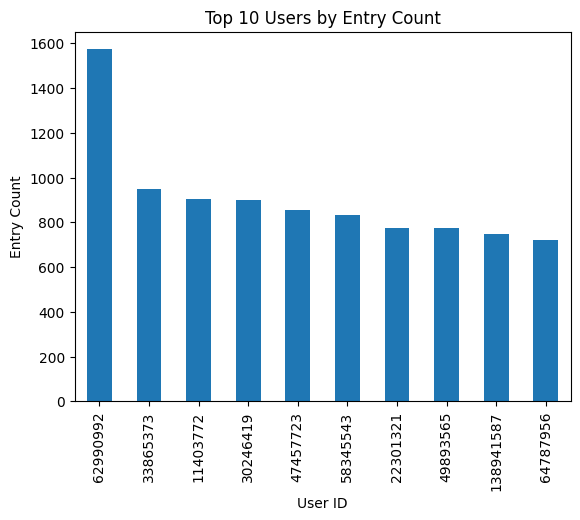

In [20]:
# Top 10 users by movie played
top_user = data.groupby('user_id').size().nlargest(10)
top_user.plot.bar()
plt.title('Top 10 Users by Entry Count')
plt.xlabel('User ID')
plt.ylabel('Entry Count')

In [18]:
top_user.index

Index([ 62990992,  33865373,  11403772,  30246419,  47457723,  58345543,
        22301321,  49893565, 138941587,  64787956],
      dtype='int64', name='user_id')

In [ ]:
# Preprocess data
data['hours_played'] = data.apply(lambda row: row['hours'] if row['behavior']=='played' else 1, axis=1)
features = ['game_name', 'hours', 'description']
X = data[features]

# Build item profiles
vectorizer = CountVectorizer()
item_profiles = vectorizer.fit_transform(X['description'].fillna(''))

# Build user profiles
user_id = 'user_1'
user_data = data[data['user_id']==user_id]
user_profile = user_data.groupby(['game_name']).agg({'hours_played': 'sum'})
user_profile = vectorizer.transform(user_profile.index)

# Calculate similarity between items and users
cosine_similarities = cosine_similarity(user_profile, item_profiles).flatten()
recommended_indices = cosine_similarities.argsort()[::-1][:10]
recommended_games = X.iloc[recommended_indices]

print(recommended_games['game_name'])